**Decision Tree Classification**

**Imports**

In [223]:
# importing the libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder # encoding function for the target values

**Obtation and Exploratory Analysis**

In [224]:
# importing the dataset:
df = pd.read_csv('dataset.csv')

# let´s see some features of it:
# the dataset shape:
print(df.shape)

# how many men are in the dataset:
men = df['Gender'] == 'Male'
df_men = df[men]
print(df_men.shape)

# statistical data about the age of people in the dataset:
print(df.describe())

(520, 17)
(328, 17)
              Age
count  520.000000
mean    48.028846
std     12.151466
min     16.000000
25%     39.000000
50%     47.500000
75%     57.000000
max     90.000000


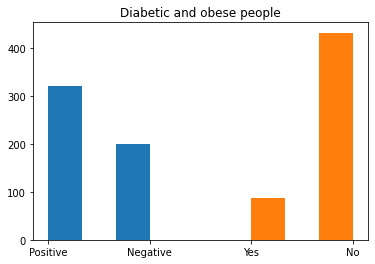

In [225]:
# histogram comparing classification (positive or negative) of people and whether or not they have obesity (yes or no):
plt.hist(df['class'], bins=3);
plt.hist(df['Obesity'], bins=3);
plt.title('Diabetic and obese people');
#plt.savefig('graphic_1.jpg', format='jpg')

In [226]:
# checking for missing data (NaN):
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

**Pre-processing Data**

In [227]:
# making the "One Hot Encoding":
df_encoded = pd.get_dummies(df, columns=["Gender", "Polyuria", "Polydipsia", "sudden weight loss", "weakness", "Polyphagia", "Genital thrush", "visual blurring", "Itching", "Irritability", "delayed healing", "partial paresis", "muscle stiffness", "Alopecia", "Obesity"])

# rearranging the order of columns, to facilitate visualization and manipulation of features and target:
df_encoded = df_encoded[['Age', 'Gender_Female', 'Gender_Male', 'Polyuria_No', 'Polyuria_Yes', 'Polydipsia_No', 'Polydipsia_Yes', 'sudden weight loss_No', 'sudden weight loss_Yes', 'weakness_No', 'weakness_Yes', 'Polyphagia_No', 'Polyphagia_Yes', 'Genital thrush_No', 'Genital thrush_Yes', 
                                           'visual blurring_No', 'visual blurring_Yes', 'Itching_No', 'Itching_Yes', 'Irritability_No', 'Irritability_Yes', 'delayed healing_No', 'delayed healing_Yes', 'partial paresis_No', 'partial paresis_Yes', 'muscle stiffness_No', 'muscle stiffness_Yes', 'Alopecia_No', 'Alopecia_Yes', 'Obesity_No', 'Obesity_Yes', 'class']]

# "X" is a list of features values (all columns except the last one):
X = df_encoded.iloc[:, :-1].values

# and "y" is a list of target values (just the last column):
y = df_encoded.iloc[:, -1].values

# "Label Encoder", for the target values:
# encoding
le = LabelEncoder()
# transforming
y = le.fit_transform(y)

# now, we have X and y as lists of encoded values